In [8]:
import pandas as pd
import random
from pandas import DataFrame
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from os import path

# Directory where data is stored
DATA_DIR = '../resources/code-soccer-files-main/data'

# load data
dfs = pd.read_csv(path.join(DATA_DIR, 'shots.csv'))
dfm = pd.read_csv(path.join(DATA_DIR, 'matches.csv'))
dft = pd.read_csv(path.join(DATA_DIR, 'teams.csv'))

# process data
# note: figured this out through trial and error - makes coordinates roughly
# field shaped going left to right
dfs = pd.merge(dfs, dfm[['match_id', 'home_team', 'away_team']], how='left')
dfs = pd.merge(dfs, dft[['team_id', 'team']], how='left')

dfs['x'] = dfs['x1']*120/100
dfs['y'] = (100 - dfs['y1'])*75/100

dfs[['name', 'dist_m', 'foot', 'goal', 'x', 'y']].head(5)

,name,dist_m,foot,goal,x,y
0,A. Samedov,12.987566,right,False,108.0,23.25
1,Yasir Al Shahrani,16.559476,right,False,104.4,54.75
2,Y. Zhirkov,17.013624,left,False,103.2,52.50
3,Y. Gazinskiy,8.506812,head/body,True,111.6,30.00
4,Mohammad Al Sahlawi,15.975528,left,False,103.2,46.50


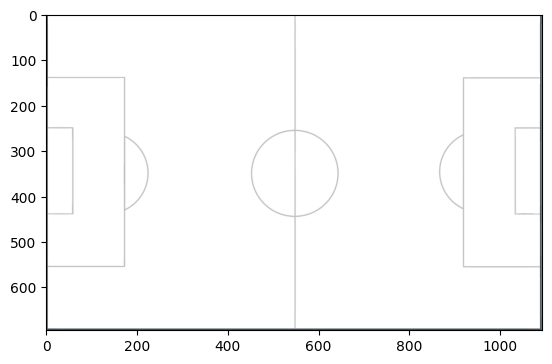

In [9]:
import matplotlib.image as mpimg

# field image
map_img = mpimg.imread(path.join(DATA_DIR, 'soccer_field.png'))
plt.imshow(map_img)

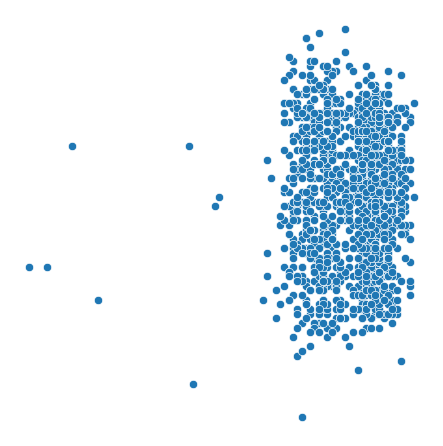

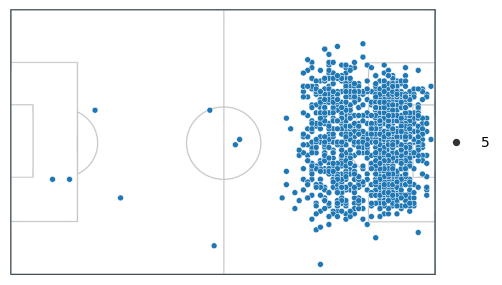

In [10]:
# shot data
g = sns.relplot(data=dfs, x='x', y='y', kind='scatter')
g.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
g.despine(left=True, bottom=True)

# scatter plot with field overlay
g = sns.relplot(data=dfs, x='x', y='y', kind='scatter', size=5)
g.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
g.despine(left=True, bottom=True)
for ax in g.fig.axes:
    ax.imshow(map_img, zorder=0, extent=[0, 120, 0, 75])


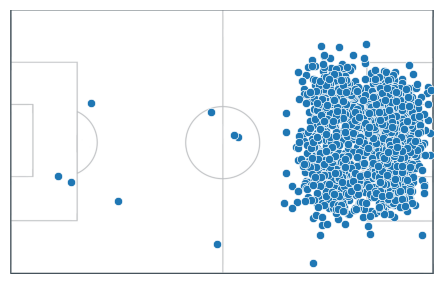

In [11]:
# jitter
dfs['xj'] = dfs['x'].apply(lambda x: x + random.gauss(0, 1))
dfs['yj'] = dfs['y'].apply(lambda x: x + random.gauss(0, 1))

g = sns.relplot(data=dfs, x='xj', y='yj', kind='scatter')
for ax in g.fig.axes:
    ax.imshow(map_img, zorder=0, extent=[0, 120, 0, 75])
g.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
g.despine(left=True, bottom=True)
plt.show()

In [12]:
# as a function 

# putting it in a function
def shot_chart(df, **kwargs):
    g = sns.relplot(data=df, x='xj', y='yj', kind='scatter', **kwargs)
    g.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
    g.despine(left=True, bottom=True)

    for ax in g.fig.axes:
        ax.imshow(map_img, zorder=0, extent=[0, 120, 0, 75])

    return g

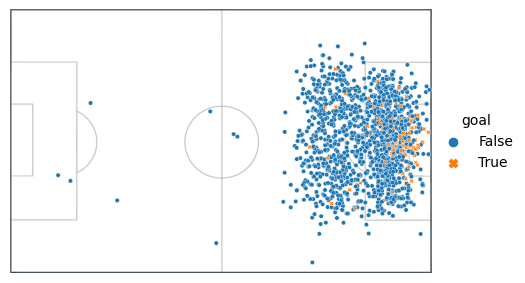

In [13]:
shot_chart(dfs, hue='goal', style='goal', s=10)


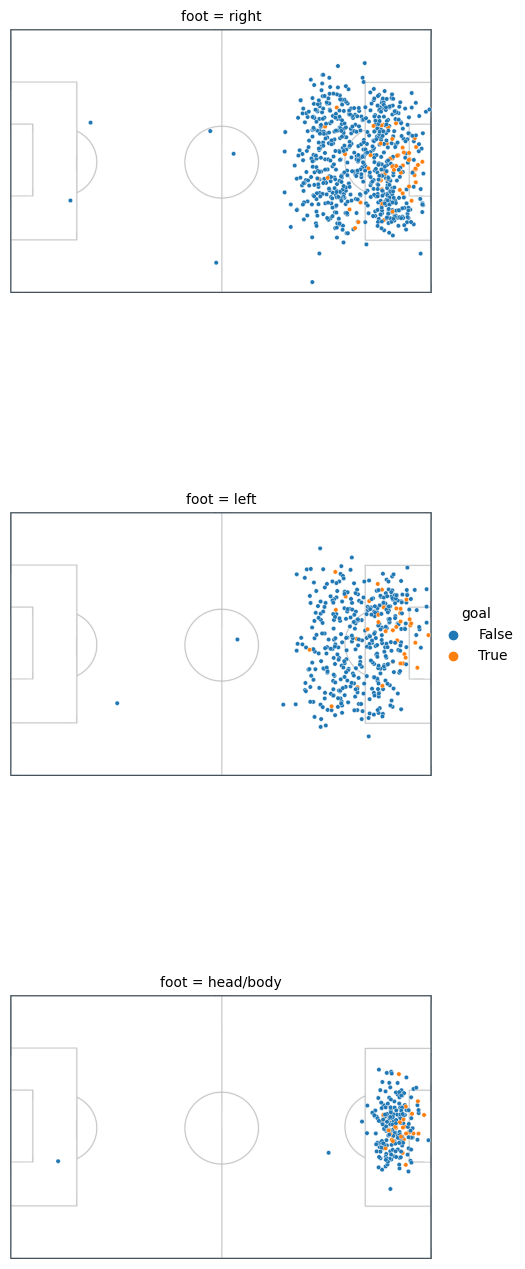

In [15]:
shot_chart(dfs, row='foot', hue='goal', s=10)

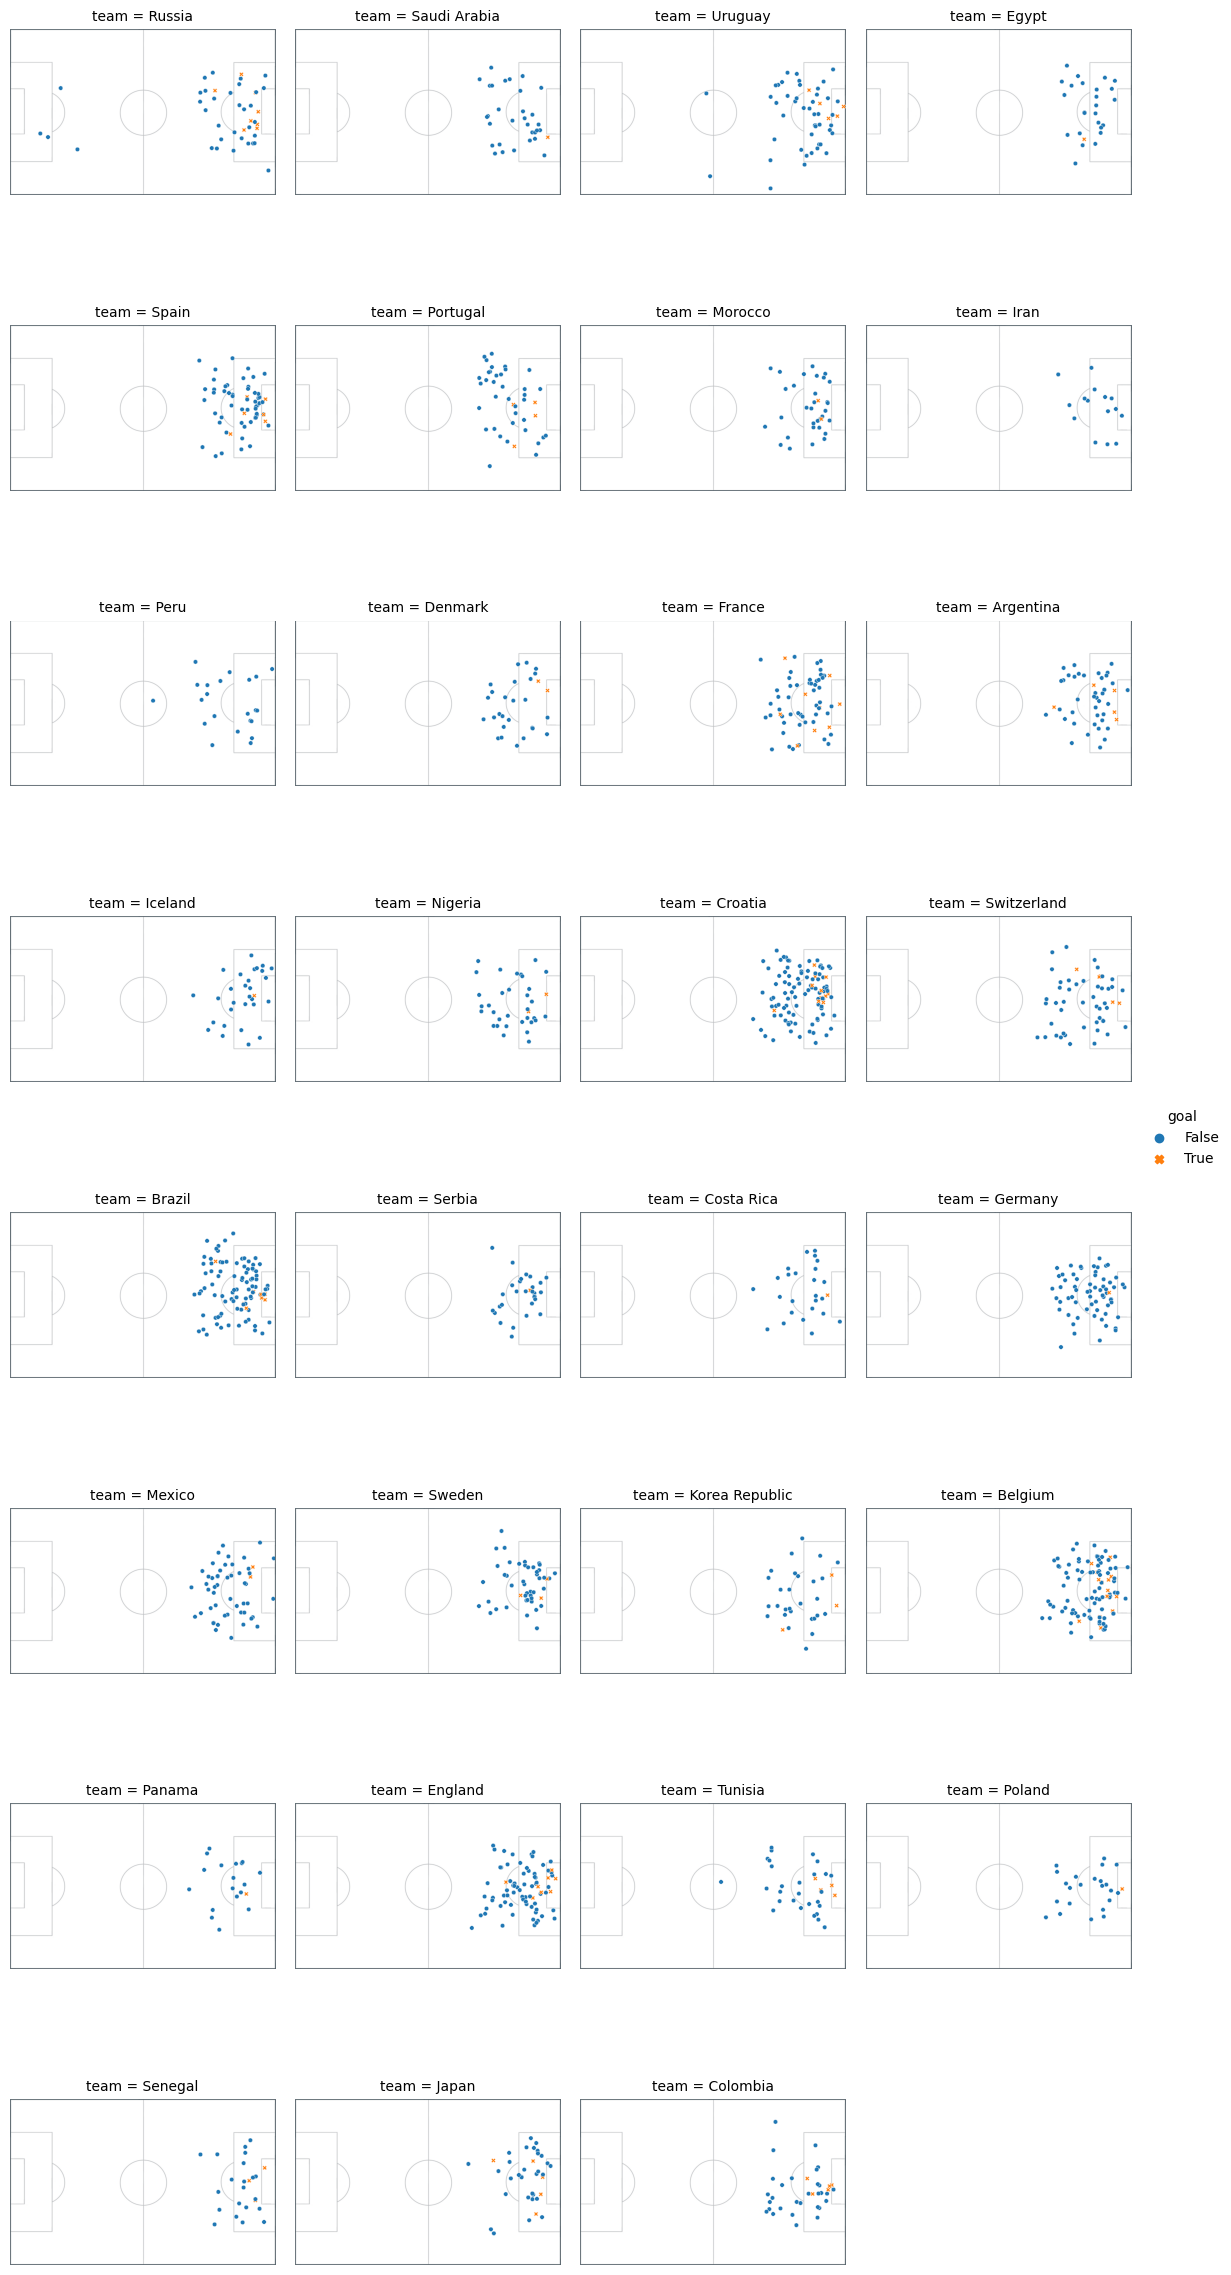

In [16]:
# and columns
shot_chart(dfs, hue='goal', style='goal', col='team', height=3, col_wrap=4,
           s=10)

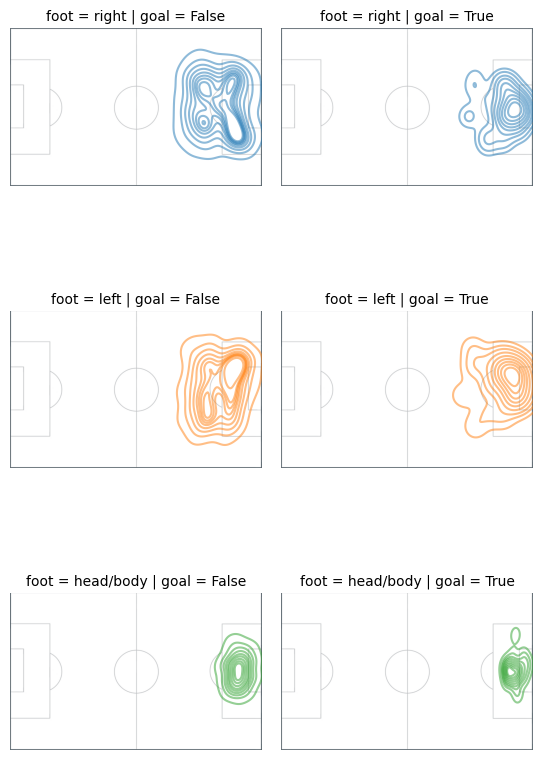

In [17]:
# Contour plot
g = (sns.FacetGrid(dfs, row='foot', hue='foot', col='goal')
     .map(sns.kdeplot, 'x', 'y', alpha=0.5))
g.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
g.despine(left=True, bottom=True)
for ax in g.fig.axes:
    ax.imshow(map_img, zorder=0, extent=[0, 120, 0, 75])

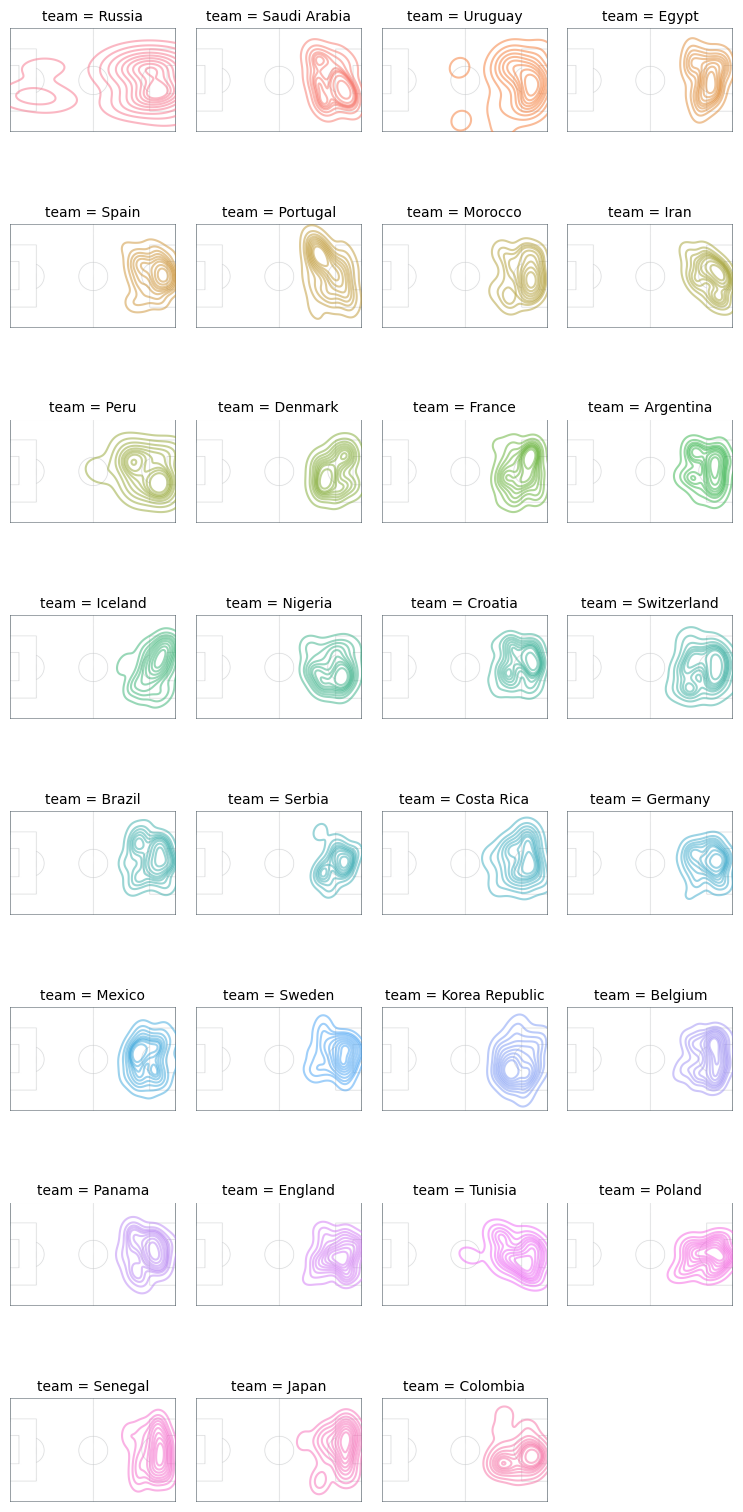

In [18]:
# turn shading off - by team
g = (sns.FacetGrid(dfs, col='team', col_wrap=4, height=2, hue='team')
     .map(sns.kdeplot, 'x', 'y', alpha=0.5))
g.set(yticks=[], xticks=[], xlabel=None, ylabel=None)
g.despine(left=True, bottom=True)
for ax in g.fig.axes:
    ax.imshow(map_img, zorder=0, extent=[0, 120, 0, 75])